# Finding Contours in An Image

### In simple image, blurred, and after applying thresold

In [ ]:
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
img = cv.imread("Photos/dog3.jpg")

Convert to Gray

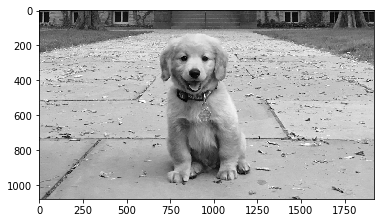

In [4]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#Show the image with matplotlib
plt.imshow(gray_img, cmap='gray')
plt.show()

### Contour Types
- cv.RETR_TREE
- cv.RETR_EXTERNAL
- cv.RETR_LIST

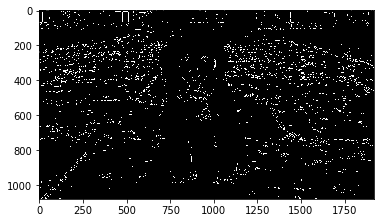

In [5]:
canny = cv.Canny(gray_img, 125, 175)
#Show the image with matplotlib
RGB_img = cv.cvtColor(canny, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [6]:
contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

3904 contour(s) found!


### **So many contours. Blurring should find more meaningful ones**

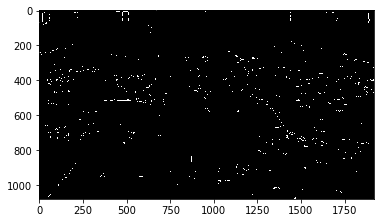

In [9]:
blur = cv.GaussianBlur(gray_img, (5,5), cv.BORDER_DEFAULT)
canny = cv.Canny(blur, 125, 200)
#Show the image with matplotlib
RGB_img = cv.cvtColor(canny, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [29]:
contours_blurred, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours_blurred)} contour(s) found!')

726 contour(s) found!


### Another way can be thresholding

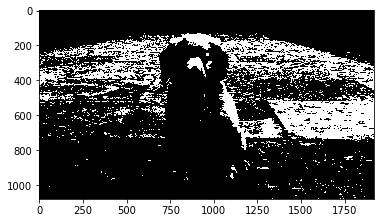

In [33]:
ret, thresh = cv.threshold(gray_img, 200, 255, cv.THRESH_BINARY)
RGB_img = cv.cvtColor(thresh, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

In [40]:
contours_thresh, hierarchies = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours_thresh)} contour(s) found!')

3391 contour(s) found!


## How about drawing the contours

In [41]:
import numpy as np
blank = np.zeros(img.shape, dtype='uint8')

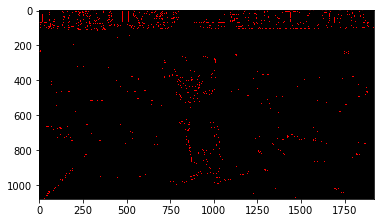

In [42]:
drawContours = cv.drawContours(blank, contours, -1, (0,0,255), 1)
RGB_img = cv.cvtColor(drawContours, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

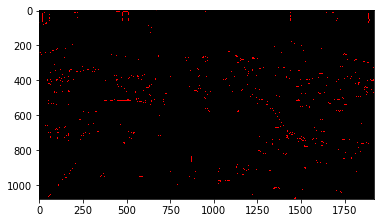

In [43]:
blank = np.zeros(img.shape, dtype='uint8')
drawContours = cv.drawContours(blank, contours_blurred, -1, (0,0,255), 1)
RGB_img = cv.cvtColor(drawContours, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

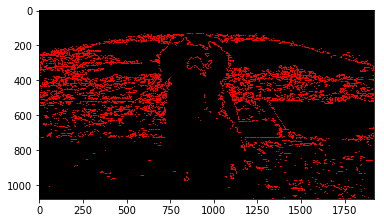

In [44]:
blank = np.zeros(img.shape, dtype='uint8')
drawContours = cv.drawContours(blank, contours_thresh, -1, (0,0,255), 2)
RGB_img = cv.cvtColor(drawContours, cv.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()